In [8]:
import os
import random
from PIL import Image
import torch
from torchvision import transforms, models
import matplotlib.pyplot as plt
from pycocotools.coco import COCO


In [9]:

# === CONFIG ===
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
BASE_PATH = "/Users/hardikm-visiobyte/Desktop/Oral_Cancer_Ampire/dataset"
MODEL_PATH = "oral_cancer_classifier.pth"
CLASS_NAMES = ['Abnormal', 'Normal', 'Null']  # Based on IDs 1,2,3

In [10]:

# === Load Model ===
model = models.resnet18(pretrained=False)
model.fc = torch.nn.Linear(model.fc.in_features, len(CLASS_NAMES))
model.load_state_dict(torch.load(MODEL_PATH, map_location=device))
model = model.to(device)
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [11]:

# === Transform (same as training) ===
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

In [51]:

# === Load COCO annotations from Test set ===
test_dir = os.path.join(BASE_PATH, "test")
ann_path = os.path.join(test_dir, "_annotations.coco.json")
coco = COCO(ann_path)
img_ids = coco.getImgIds()
img_id = random.choice(img_ids)
img_info = coco.loadImgs(img_id)[0]
img_path = os.path.join(test_dir, img_info['file_name'])

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [52]:

# === Load and preprocess image ===
img = Image.open(img_path).convert("RGB")
input_tensor = transform(img).unsqueeze(0).to(device)

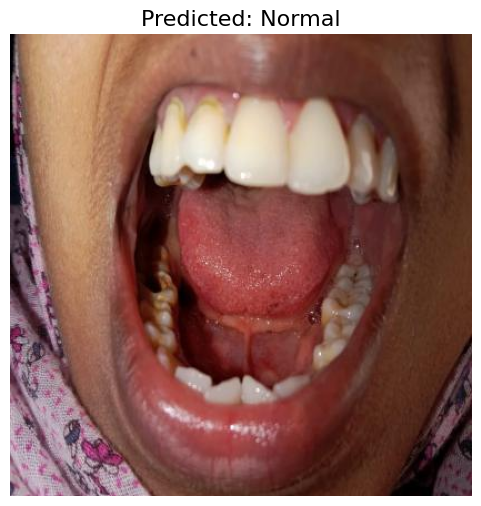

In [53]:

# === Predict ===
with torch.no_grad():
    outputs = model(input_tensor)
    _, predicted = torch.max(outputs, 1)
    predicted_label = CLASS_NAMES[predicted.item()]

# === Visualization ===
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.title(f"Predicted: {predicted_label}", fontsize=16)
plt.axis('off')
plt.show()